**# Real Estate Price EDA**

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

# 1.Load Data

In [2]:
uploaded = files.upload()
for filename in uploaded.keys():
    print(f'Loaded file: {filename}')
    df = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving real_estate_dataset.csv to real_estate_dataset.csv
Загружен файл: real_estate_dataset.csv


## 2. Data Overview

In [ ]:
df = pd.read_csv("real_estate_dataset.csv")#An alternative loading option

In [3]:
df.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


In [5]:
df.columns = df.columns.astype(str).str.strip()

In [6]:
display(df.isna().sum().sort_values(ascending=False).head(10))
display(df.describe().T)

,0
ID,0
Square_Feet,0
Num_Bedrooms,0
Num_Bathrooms,0
Num_Floors,0
Year_Built,0
Has_Garden,0
Has_Pool,0
Garage_Size,0
Location_Score,0


,count,mean,std,min,25%,50%,75%,max
ID,500.0,250.500000,144.481833,1.000000,125.750000,250.500000,375.250000,500.000000
Square_Feet,500.0,174.640428,74.672102,51.265396,110.319923,178.290937,239.031220,298.241199
Num_Bedrooms,500.0,2.958000,1.440968,1.000000,2.000000,3.000000,4.000000,5.000000
Num_Bathrooms,500.0,1.976000,0.820225,1.000000,1.000000,2.000000,3.000000,3.000000
Num_Floors,500.0,1.964000,0.802491,1.000000,1.000000,2.000000,3.000000,3.000000
Year_Built,500.0,1957.604000,35.491781,1900.000000,1926.000000,1959.000000,1988.000000,2022.000000
Has_Garden,500.0,0.536000,0.499202,0.000000,0.000000,1.000000,1.000000,1.000000
Has_Pool,500.0,0.492000,0.500437,0.000000,0.000000,0.000000,1.000000,1.000000
Garage_Size,500.0,30.174000,11.582575,10.000000,20.000000,30.000000,41.000000,49.000000
Location_Score,500.0,5.164410,2.853489,0.004428,2.760650,5.206518,7.732933,9.995439


In [14]:
average_price = df['Price'].mean()
print(average_price)

582209.6295285609


In [8]:
df.columns.values

array(['ID', 'Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors',
       'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size',
       'Location_Score', 'Distance_to_Center', 'Price'], dtype=object)

In [9]:
df.dtypes

,0
ID,int64
Square_Feet,float64
Num_Bedrooms,int64
Num_Bathrooms,int64
Num_Floors,int64
Year_Built,int64
Has_Garden,int64
Has_Pool,int64
Garage_Size,int64
Location_Score,float64


## 3. Missing Values

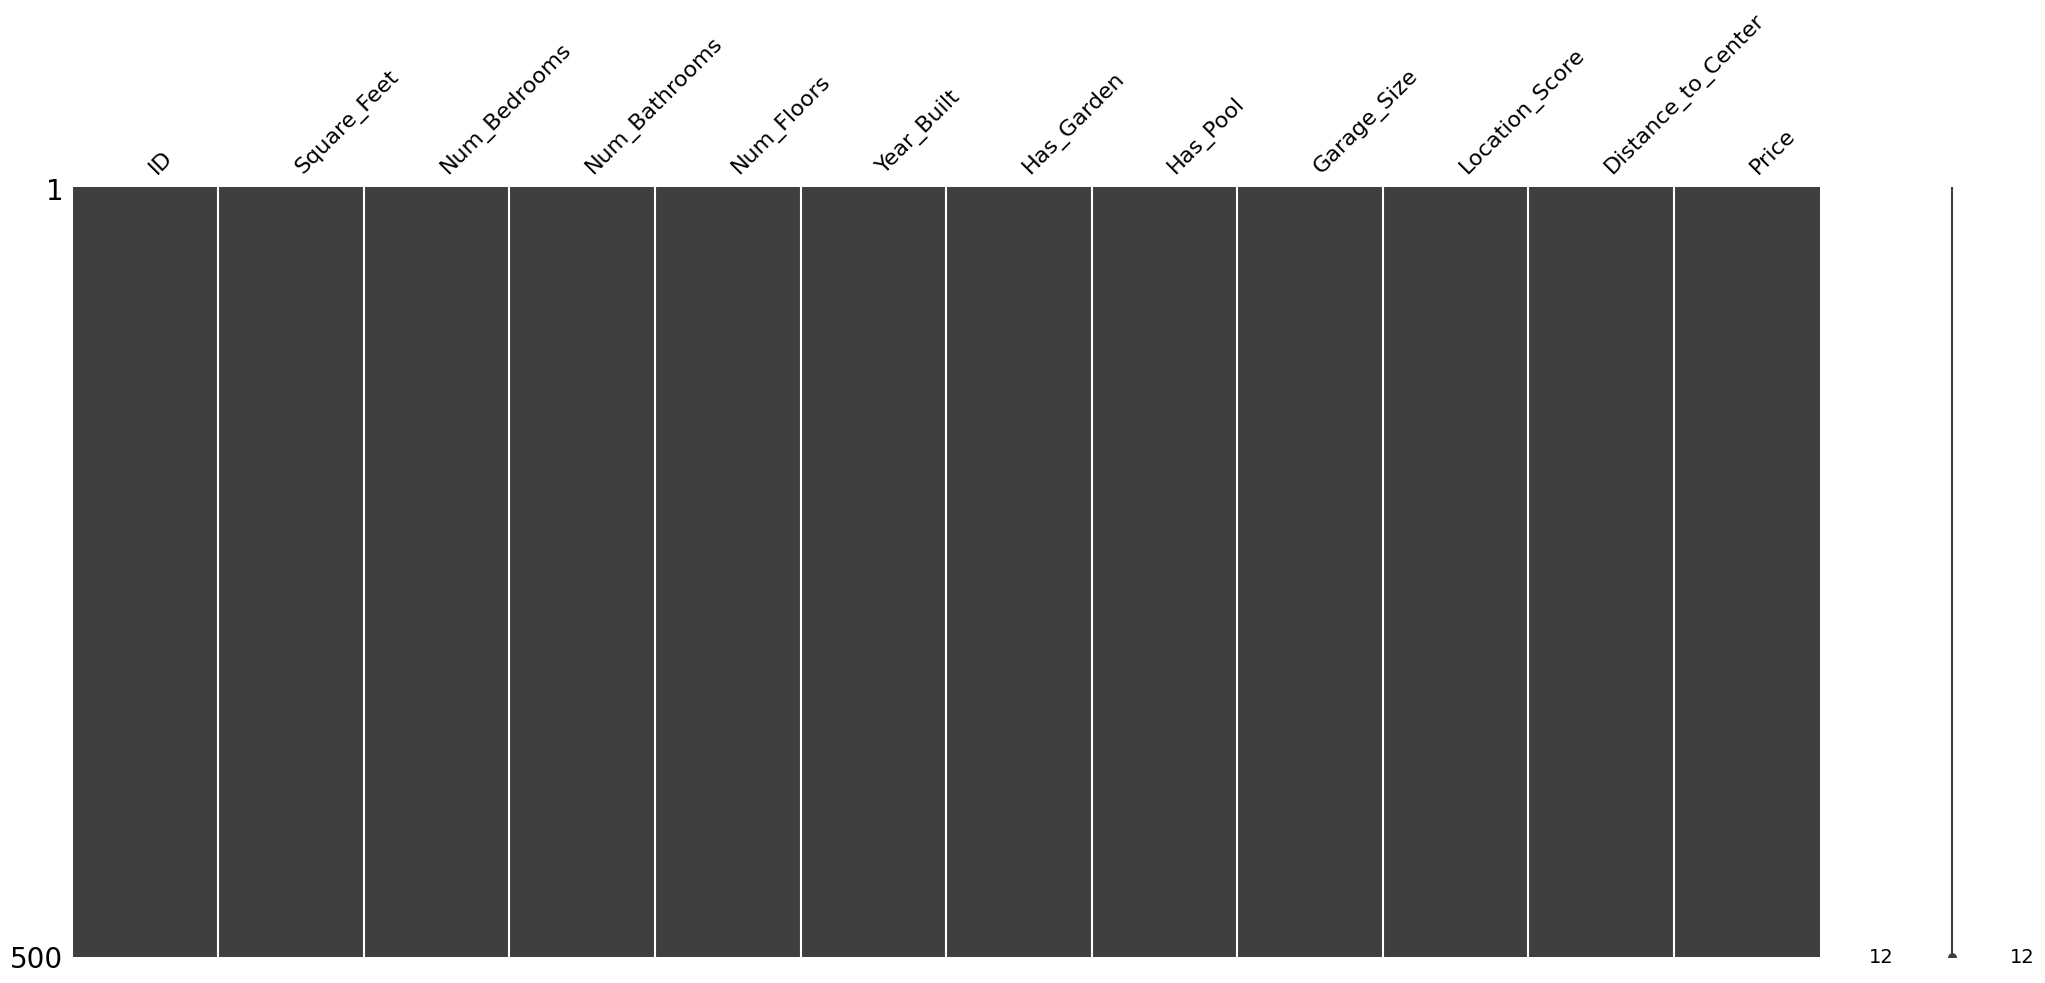

In [10]:
msno.matrix(df)

In [30]:
df.fillna(df.median(), inplace=True)

In [15]:
df = df.drop(['ID'], axis = 1)
df.head()

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [12]:
df.isnull().sum()

,0
ID,0
Square_Feet,0
Num_Bedrooms,0
Num_Bathrooms,0
Num_Floors,0
Year_Built,0
Has_Garden,0
Has_Pool,0
Garage_Size,0
Location_Score,0


In [19]:
TARGET='Price'

## 4. Feature Correlations

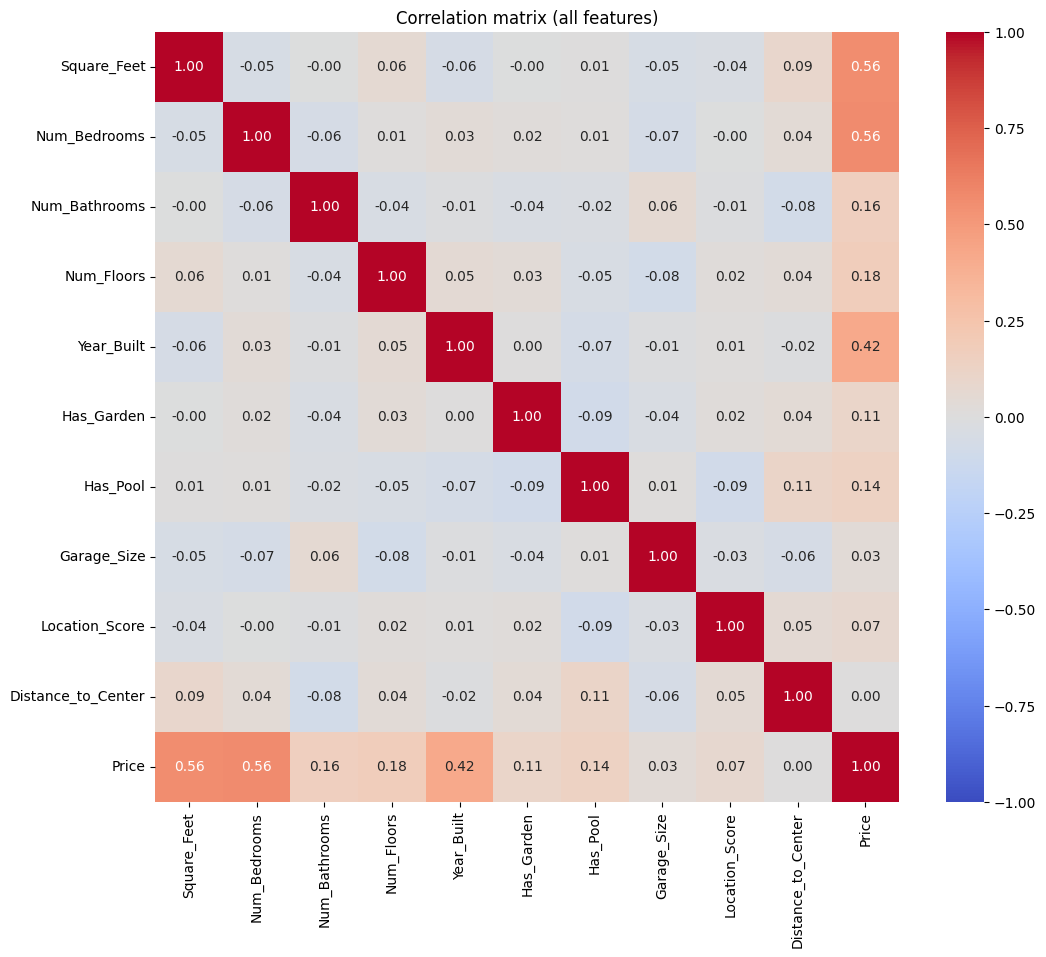

Top correlated features with target (by abs correlation):


,Price
Num_Bedrooms,0.563973
Square_Feet,0.558604
Year_Built,0.418293
Num_Floors,0.177435
Num_Bathrooms,0.156689
Has_Pool,0.136579
Has_Garden,0.109196
Location_Score,0.071326
Garage_Size,0.032100
Distance_to_Center,0.000730


Top 10 features: ['Num_Bedrooms', 'Square_Feet', 'Year_Built', 'Num_Floors', 'Num_Bathrooms', 'Has_Pool', 'Has_Garden', 'Location_Score', 'Garage_Size', 'Distance_to_Center']


In [20]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, vmax=1, vmin=-1)
plt.title('Correlation matrix (all features)')
plt.show()
target_corr = corr[TARGET].drop(labels=[TARGET]).abs().sort_values(ascending=False)
print("Top correlated features with target (by abs correlation):")
display(target_corr.head(20))
top_corr_features = list(target_corr.head(10).index)
print("Top 10 features:", top_corr_features)

## 5. Target Analysis (Price)

In [23]:
mean_price = df['Price'].mean()
median_price = df['Price'].median()
std_price = df['Price'].std()
print(f"Average price: {mean_price:.2f}")
print(f"Median price: {median_price:.2f}")
print(f"Standart deviation: {std_price:.2f}")

Средняя цена: 582209.63
Медианная цена: 574724.11
Стандартное отклонение: 122273.39


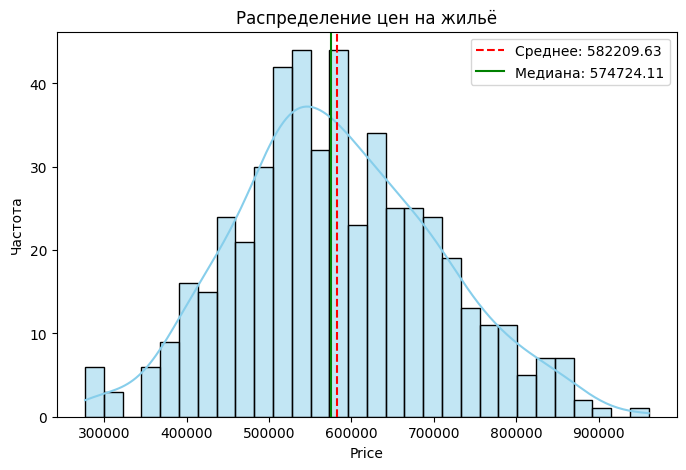

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, bins=30, color='skyblue')
plt.axvline(mean_price, color='red', linestyle='--', label=f'mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='-', label=f'median: {median_price:.2f}')
plt.legend()
plt.title('Destrubution of house Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

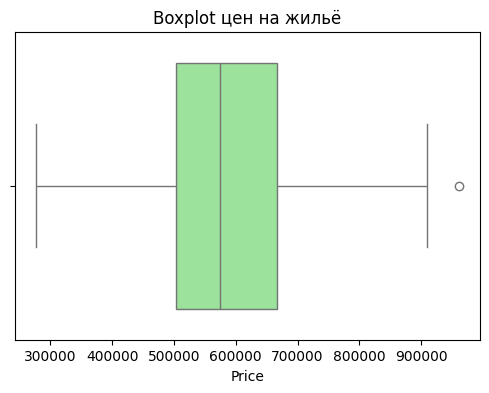

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Price'], color='lightgreen')
plt.title('Boxplot of Prices')
plt.show()

## 6. Conclusions

- The price distribution is unimodal but shows noticeable right skew: the mean is slightly higher than the median. This indicates the presence of higher-priced properties pulling the average upward.
- The boxplot confirms a wide spread of prices and the presence of at least one clear right-side outlier (very expensive property/properties).
- The median is a more robust measure for describing a “typical” price, as it is less sensitive to outliers.
- Overall, the price distribution is approximately normal but positively skewed. The long right tail reflects high-value properties that shift the mean above the median.